In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


/home/pappa/anaconda3/lib/python3.8/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/pappa/anaconda3/lib/python3.8/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

557056/550378 [==============================] - 1s 1us/step


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

2022-11-05 15:15:42.014347: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-11-05 15:15:42.035873: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-11-05 15:15:42.035893: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: pappa-GP66-Leopard-11UH
2022-11-05 15:15:42.035897: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: pappa-GP66-Leopard-11UH
2022-11-05 15:15:42.035983: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.129.6
2022-11-05 15:15:42.035993: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.129.6
2022-11-05 15:15:42.035996: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.129.6
2022-11-05 15:15:42.036750: I tensorflow/core/platform/c

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 50us/step - loss: 2.7406 - accuracy: 0.4437 - val_loss: 1.8158 - val_accuracy: 0.6160
Epoch 2/20
7982/7982 [==============================] - 0s 33us/step - loss: 1.4704 - accuracy: 0.6825 - val_loss: 1.3452 - val_accuracy: 0.7030
Epoch 3/20
7982/7982 [==============================] - 0s 33us/step - loss: 1.0803 - accuracy: 0.7667 - val_loss: 1.1933 - val_accuracy: 0.7190
Epoch 4/20
7982/7982 [==============================] - 0s 33us/step - loss: 0.8509 - accuracy: 0.8187 - val_loss: 1.0619 - val_accuracy: 0.7870
Epoch 5/20
7982/7982 [==============================] - 0s 34us/step - loss: 0.6836 - accuracy: 0.8574 - val_loss: 0.9844 - val_accuracy: 0.8050
Epoch 6/20
7982/7982 [==============================] - 0s 34us/step - loss: 0.5441 - accuracy: 0.8867 - val_loss: 0.9590 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 0s 34us/step - loss: 0.439

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Bad key text.latex.preview in file /home/pappa/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pappa/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pappa/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality p

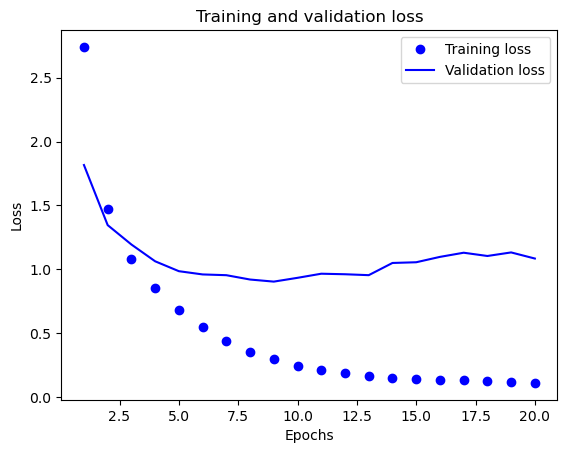

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

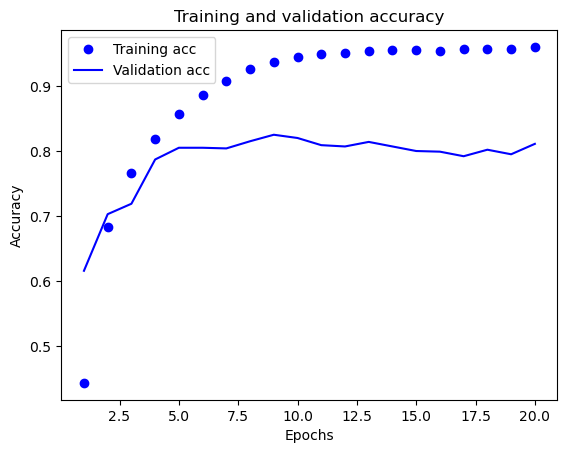

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 0s 33us/step - loss: 2.6223 - acc: 0.4771 - val_loss: 1.7644 - val_acc: 0.6390
Epoch 2/8
7982/7982 [==============================] - 0s 32us/step - loss: 1.4653 - acc: 0.7077 - val_loss: 1.3406 - val_acc: 0.7000
Epoch 3/8
7982/7982 [==============================] - 0s 31us/step - loss: 1.0864 - acc: 0.7739 - val_loss: 1.1480 - val_acc: 0.7520
Epoch 4/8
7982/7982 [==============================] - 0s 32us/step - loss: 0.8593 - acc: 0.8171 - val_loss: 1.0441 - val_acc: 0.7810
Epoch 5/8
7982/7982 [==============================] - 0s 31us/step - loss: 0.6810 - acc: 0.8534 - val_loss: 0.9875 - val_acc: 0.7830
Epoch 6/8
7982/7982 [==============================] - 0s 30us/step - loss: 0.5455 - acc: 0.8867 - val_loss: 0.9173 - val_acc: 0.8160
Epoch 7/8
7982/7982 [==============================] - 0s 31us/step - loss: 0.4365 - acc: 0.9074 - val_loss: 0.8996 - val_acc: 0.8130
Epoch 8/8
2246

In [14]:
results

[0.9660146881827051, 0.7862867116928101]

In [15]:
model.predict(x_test)

array([[1.1445613e-05, 5.6749588e-05, 2.8240754e-06, ..., 1.7276972e-05,
        8.8828956e-06, 8.5404785e-08],
       [8.6900219e-03, 2.3284060e-01, 9.8288305e-02, ..., 5.1151204e-04,
        4.3191149e-06, 3.3074239e-04],
       [1.0337878e-03, 9.2628396e-01, 2.2384871e-03, ..., 3.5112048e-04,
        8.1762146e-06, 6.6851598e-04],
       ...,
       [2.3170487e-06, 2.0693200e-04, 5.5970245e-06, ..., 9.3883355e-06,
        1.7623353e-05, 1.7287853e-06],
       [1.7586754e-03, 1.7453467e-02, 1.2534948e-03, ..., 7.9725630e-04,
        3.5152200e-04, 1.6521337e-04],
       [4.2649737e-04, 8.0004692e-01, 4.3525328e-03, ..., 4.4914740e-04,
        5.0057124e-06, 7.9845719e-04]], dtype=float32)